In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        # Implement this!
        action_values = Q[observation]
        optimal_action = np.argmax(action_values)
        act_prob = np.zeros(nA)
        act_prob[:] = epsilon / nA
        act_prob[optimal_action] = 1 - epsilon + epsilon / nA
        return act_prob
        
    return policy_fn

In [4]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities
    """
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    # Implement this!
    # Implement this!
    for i in np.arange(num_episodes):
        episode_obs = []
        episode_rewards = []
        observation = env.reset()

        for j in np.arange(200):
            action = np.random.choice(np.arange(env.nA), p=policy(observation))
            next_observation, reward, done, _ = env.step(action)
            episode_obs.append((observation, action))
            episode_rewards.append(reward)
            if done:
                break
            observation = next_observation
    
        # find the first occurrence of each observation and calculate the returns
        num_steps = len(episode_obs)
        all_obs = set(episode_obs)
        for ob in all_obs:
            first_index = episode_obs.index(ob)
            len2end = num_steps - first_index  # include the first occurrence
            G = sum([np.power(discount_factor, i) * episode_rewards[first_index + i] for i in np.arange(len2end)])
            returns_sum[ob] += G
            returns_count[ob] += 1.0
    
    for act_ob in returns_sum.keys():
        ob = act_ob[0]
        act = act_ob[1]
        Q[ob][act] = returns_sum[act_ob] / returns_count[act_ob]
    
    return Q, policy

In [5]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=500000, epsilon=0.1)

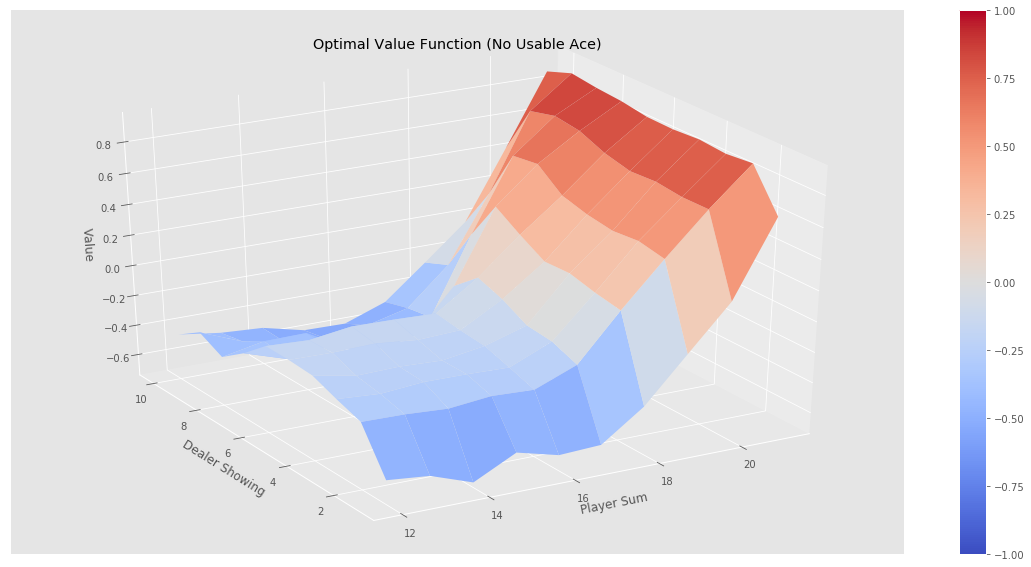

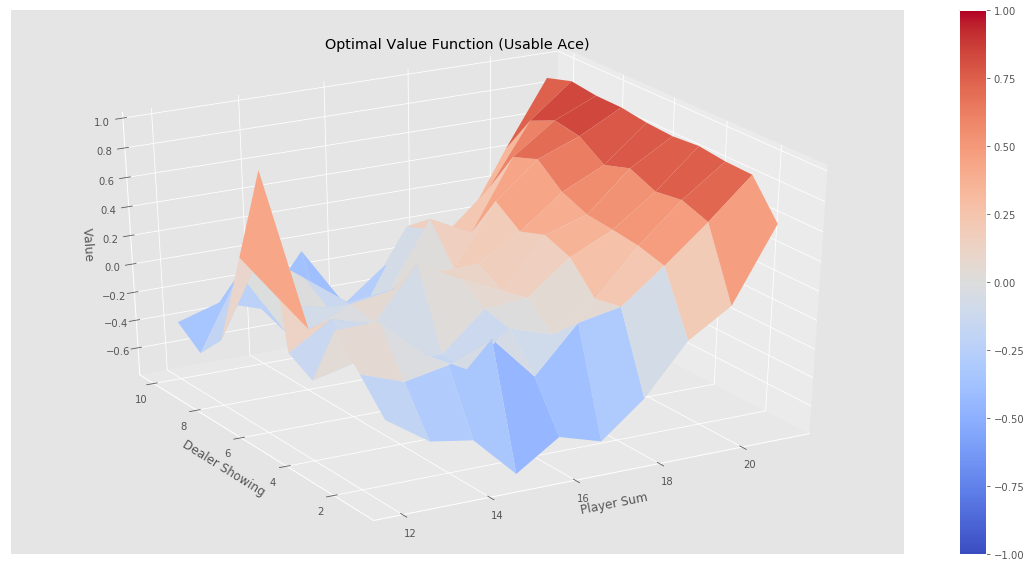

In [6]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")